In [122]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd
from scipy.optimize import minimize
import pickle

In [92]:
with open('..//data//women_hours_empirical', 'rb') as f:
    women_hours = pickle.load(f)
    
with open('..//data//women_salary_mean.pkl', 'rb') as f:
    women_salary = pickle.load(f)

In [317]:
class SalaryProcess:
    
    S_min = 120
    PARAMETERS = {
        'sigma_epsilon'  : 0.15,
        'alpha' :1.2,
        'eta_G'  : 1.2,
        'eta_Z'  : 1.2,
        'delta'  : 0.9,
    }
    
    def __init__(self, log_Z=1, G=0, Q=18, sex='women', parameters = PARAMETERS):
        self.log_Z = log_Z
        self.G = G
        self.Q = Q
        self.sex = sex
        self.parameters = parameters
        
    def reset(self):
        self.Q = 18
        self.G = 0
        self.log_Z = 1
        
    def step(self):
        
        if self.Q == 70:
            self.reset()
        else:
            self.Q = self.Q + 1
            self.G = self.parameters['delta'] * self.G + self.H() / 37
            self.log_Z = self.log_Z + np.random.normal(0, self.parameters['sigma_epsilon'])
            
        S = self.calc_salary()
        return (S, self.log_Z, self.G, self.Q)
            
    def H(self):
        return women_hours[self.Q]
        
    def calc_salary(self):
        log_S_tilde = self.parameters['alpha'] + self.parameters['eta_G'] * np.log(self.G+1) + self.parameters['eta_Z'] * self.log_Z 
        
        S_tilde = np.exp(log_S_tilde)
        S = np.max([S_tilde, self.S_min])
        if pd.isnull(S):
            print(S_tilde, log_S_tilde, S)
        return S

In [318]:
def calc_mse_women(y_pred):
    y_true = women_salary[18:71]
    y_pred = np.array(y_pred)
    return np.mean((y_true - y_pred)**2)

RESULTS = list()

def obj(x):
    
    parameters = {
        'sigma_epsilon' : x[0],
        'alpha' : x[1],
        'eta_G'  : x[2],
        'eta_Z'  : x[3],
        'delta'  : x[4],
    }
    
    sp = SalaryProcess(parameters = parameters)
    results = list()

    for _ in range((70-18) * 500):
    
        res = sp.step()
        results.append(res)
        
    df = pd.DataFrame(results, columns = ['S', 'log Z', 'G', 'Q'])
    y_pred = np.array(df.groupby('Q').mean()['S'])
    mse = calc_mse_women(y_pred)
    parameters['mse'] = mse
    RESULTS.append(parameters)
    print(int(mse), parameters)
    
    return mse

In [297]:
df = pd.DataFrame(results, columns = ['S', 'log Z', 'G', 'Q'])
y_pred = np.array(df.groupby('Q').mean()['S'])

In [298]:
LL=list()
def f():
    LL.append('a')

In [303]:
parameters = list

bounds = [
    (0.05, None),
    (0.1, None),
    (0.05, None),
    (0.05, None),
    (0, 4),
]
x0 = (0.4, 1.3, 0.95, 0.5, 0.9)
sol = minimize(obj, x0, bounds=bounds)

3971.907949233734 {'sigma_epsilon': 0.4, 'alpha': 1.3, 'eta_G': 0.95, 'eta_Z': 0.5, 'delta': 0.9, 'mse': 3971.907949233734}
3592.3537134718717 {'sigma_epsilon': 0.40000001, 'alpha': 1.3, 'eta_G': 0.95, 'eta_Z': 0.5, 'delta': 0.9, 'mse': 3592.3537134718717}
2616.864300399933 {'sigma_epsilon': 0.4, 'alpha': 1.30000001, 'eta_G': 0.95, 'eta_Z': 0.5, 'delta': 0.9, 'mse': 2616.864300399933}
4021.9363441068144 {'sigma_epsilon': 0.4, 'alpha': 1.3, 'eta_G': 0.95000001, 'eta_Z': 0.5, 'delta': 0.9, 'mse': 4021.9363441068144}
2875.424398828539 {'sigma_epsilon': 0.4, 'alpha': 1.3, 'eta_G': 0.95, 'eta_Z': 0.50000001, 'delta': 0.9, 'mse': 2875.424398828539}
3358.959771801411 {'sigma_epsilon': 0.4, 'alpha': 1.3, 'eta_G': 0.95, 'eta_Z': 0.5, 'delta': 0.9000000100000001, 'mse': 3358.959771801411}
46988009533.281784 {'sigma_epsilon': 0.612760469774287, 'alpha': 2.059574511694889, 'eta_G': 0.949999999994955, 'eta_Z': 1.1146377336975783, 'delta': 0.9000000000173772, 'mse': 46988009533.281784}
1080648378530

3824.3539249963014 {'sigma_epsilon': 0.40000001291703813, 'alpha': 1.3000000185978424, 'eta_G': 0.9499999984099634, 'eta_Z': 0.500000013863538, 'delta': 0.9000000123083254, 'mse': 3824.3539249963014}
3225.524425788754 {'sigma_epsilon': 0.40000001319899897, 'alpha': 1.3000000117790704, 'eta_G': 0.9499999974674435, 'eta_Z': 0.500000007104292, 'delta': 0.9000000017951552, 'mse': 3225.524425788754}
3601.3068022461057 {'sigma_epsilon': 0.40000002319899897, 'alpha': 1.3000000117790704, 'eta_G': 0.9499999974674435, 'eta_Z': 0.500000007104292, 'delta': 0.9000000017951552, 'mse': 3601.3068022461057}
3981.908010479939 {'sigma_epsilon': 0.40000001319899897, 'alpha': 1.3000000217790704, 'eta_G': 0.9499999974674435, 'eta_Z': 0.500000007104292, 'delta': 0.9000000017951552, 'mse': 3981.908010479939}
3152.0586154126768 {'sigma_epsilon': 0.40000001319899897, 'alpha': 1.3000000117790704, 'eta_G': 0.9500000074674435, 'eta_Z': 0.500000007104292, 'delta': 0.9000000017951552, 'mse': 3152.0586154126768}
3294

3487.6676320486777 {'sigma_epsilon': 0.40000001291703813, 'alpha': 1.3000000185978424, 'eta_G': 0.9499999984099634, 'eta_Z': 0.500000013863538, 'delta': 0.9000000123083254, 'mse': 3487.6676320486777}


In [306]:
sol
#sol.x
RESULTS_DF = pd.DataFrame(RESULTS) 

In [308]:
RESULTS_DF.loc[RESULTS_DF['mse'].min() == RESULTS_DF['mse']]

,sigma_epsilon,alpha,eta_G,eta_Z,delta,mse
94,0.4,1.300001,0.95,0.500001,0.9,2537.089764


In [305]:
sol

      fun: 3268.58277877743
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.88222288e+10,  3.90182636e+10, -1.78960112e+10,  9.44104641e+10,
        2.19084853e+10])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 90
      nit: 3
   status: 0
  success: True
        x: array([0.40000001, 1.30000002, 0.95      , 0.50000001, 0.9       ])

In [319]:
param_candidates = list()
for _ in range(300):
    candidate = [
        np.random.uniform(0.1, 1),
        np.random.uniform(0.23, 3.0),
        np.random.uniform(0.5, 1.2),
        np.random.uniform(0.5, 1.2),
        np.random.uniform(0.8, 0.9)
    ]
    param_candidates.append(candidate)

candidates_results = list()
for c in param_candidates:
    mse = obj(c)
    print(mse)
    c.append(mse)
    candidates_results.append(c)

1114 {'sigma_epsilon': 0.1497797969861046, 'alpha': 2.698442151963178, 'eta_G': 0.8255693619132792, 'eta_Z': 0.6177648175048391, 'delta': 0.8926293923187767, 'mse': 1114.0261649105587}
1114.0261649105587
23273225502 {'sigma_epsilon': 0.8381857949397905, 'alpha': 1.804089522248581, 'eta_G': 0.5999478300423318, 'eta_Z': 0.783078405671497, 'delta': 0.8619112396630313, 'mse': 23273225502.962093}
23273225502.962093
1326279 {'sigma_epsilon': 0.2660259521941203, 'alpha': 2.8835631678979423, 'eta_G': 0.7680240105910028, 'eta_Z': 1.1628194698174024, 'delta': 0.8412913304207307, 'mse': 1326279.3203835038}
1326279.3203835038
20204067437 {'sigma_epsilon': 0.6515015204704517, 'alpha': 2.0657773526731753, 'eta_G': 0.7099929084599572, 'eta_Z': 0.9654117062292651, 'delta': 0.8899497845093577, 'mse': 20204067437.335594}
20204067437.335594
8228 {'sigma_epsilon': 0.12471028239594124, 'alpha': 0.5571897555223607, 'eta_G': 0.9738936565291166, 'eta_Z': 0.7380688222460421, 'delta': 0.8345812773127659, 'mse':

4651 {'sigma_epsilon': 0.48677339236635253, 'alpha': 0.6163416428969357, 'eta_G': 0.864004756415057, 'eta_Z': 0.5088994193252215, 'delta': 0.879642996498958, 'mse': 4651.98060379904}
4651.98060379904
36897100447 {'sigma_epsilon': 0.8198118835412695, 'alpha': 0.5971116894634264, 'eta_G': 1.06307897173442, 'eta_Z': 0.950453139928223, 'delta': 0.8428986169089557, 'mse': 36897100447.4777}
36897100447.4777
1719209746 {'sigma_epsilon': 0.6417049591714871, 'alpha': 1.0837942682596087, 'eta_G': 0.8790410197846774, 'eta_Z': 0.9458947474330458, 'delta': 0.8768344667184549, 'mse': 1719209746.1425138}
1719209746.1425138
3738360 {'sigma_epsilon': 0.34977943376057874, 'alpha': 2.849538550378125, 'eta_G': 0.5592623757468123, 'eta_Z': 1.1473433454434425, 'delta': 0.8054541583378712, 'mse': 3738360.5784043376}
3738360.5784043376
473376740008882240 {'sigma_epsilon': 0.9321636026448381, 'alpha': 2.9701606179850297, 'eta_G': 0.9799767218536781, 'eta_Z': 1.1207700005298733, 'delta': 0.8055440426275637, 'ms

266152047 {'sigma_epsilon': 0.7798824864416194, 'alpha': 0.3764703951227455, 'eta_G': 0.7593442831552921, 'eta_Z': 0.9195314230215954, 'delta': 0.8010450805402408, 'mse': 266152047.12979266}
266152047.12979266
13620 {'sigma_epsilon': 0.35450194231509724, 'alpha': 2.7807295074637817, 'eta_G': 0.5876369720878971, 'eta_Z': 0.6803573193087018, 'delta': 0.8676913779527216, 'mse': 13620.450024420341}
13620.450024420341
385 {'sigma_epsilon': 0.13950397033648357, 'alpha': 2.6408637603818246, 'eta_G': 1.0687840836257785, 'eta_Z': 0.6283677091392015, 'delta': 0.850382180816843, 'mse': 385.6614088718392}
385.6614088718392
8220 {'sigma_epsilon': 0.145039762743222, 'alpha': 0.5392807415290714, 'eta_G': 0.7862817887843694, 'eta_Z': 0.8169981540727016, 'delta': 0.8092579538821819, 'mse': 8220.443237115835}
8220.443237115835
64345 {'sigma_epsilon': 0.16937650447148983, 'alpha': 2.1538978784100986, 'eta_G': 1.1634432441466478, 'eta_Z': 1.1639517131969135, 'delta': 0.8534628573010384, 'mse': 64345.85554

670645 {'sigma_epsilon': 0.32669597191419486, 'alpha': 1.8630286134107474, 'eta_G': 1.1566272381496132, 'eta_Z': 1.0855557252954886, 'delta': 0.8363315208734778, 'mse': 670645.7744116229}
670645.7744116229
7308045146200 {'sigma_epsilon': 0.8468681010987187, 'alpha': 1.9471339716522953, 'eta_G': 0.6526329076959192, 'eta_Z': 0.8825475898748318, 'delta': 0.817145014647954, 'mse': 7308045146200.979}
7308045146200.979
1322217870080 {'sigma_epsilon': 0.6923515679820751, 'alpha': 0.926419678960291, 'eta_G': 1.0919794220756311, 'eta_Z': 0.9597172517607772, 'delta': 0.8647089446262513, 'mse': 1322217870080.8923}
1322217870080.8923
29002202 {'sigma_epsilon': 0.34112877919971063, 'alpha': 2.91037165283247, 'eta_G': 0.9510716019868092, 'eta_Z': 1.0815519742670174, 'delta': 0.8130547102750446, 'mse': 29002202.421483297}
29002202.421483297
38486229811 {'sigma_epsilon': 0.9686319371351798, 'alpha': 0.9135070047409704, 'eta_G': 0.8100660139392208, 'eta_Z': 0.6904526743877523, 'delta': 0.84916423349373

11336 {'sigma_epsilon': 0.4471933673111227, 'alpha': 1.1591583605404983, 'eta_G': 0.7966521310189754, 'eta_Z': 0.8147833443806302, 'delta': 0.8135261525247574, 'mse': 11336.323814957512}
11336.323814957512
4595 {'sigma_epsilon': 0.31238481450827893, 'alpha': 1.2489585505361656, 'eta_G': 1.0063885453255264, 'eta_Z': 0.5765450667990892, 'delta': 0.8834802183317972, 'mse': 4595.327200416766}
4595.327200416766
98689550 {'sigma_epsilon': 0.444120254313239, 'alpha': 0.7763575481305979, 'eta_G': 0.5905131931809399, 'eta_Z': 1.1630215330181015, 'delta': 0.8271503735363085, 'mse': 98689550.2754331}
98689550.2754331
5469039920 {'sigma_epsilon': 0.7903287611361903, 'alpha': 0.23614284975886654, 'eta_G': 0.504775716194067, 'eta_Z': 0.95223475745347, 'delta': 0.8207595195922203, 'mse': 5469039920.024265}
5469039920.024265
76100 {'sigma_epsilon': 0.2020809971092259, 'alpha': 2.677542031216995, 'eta_G': 0.8285300922105434, 'eta_Z': 1.1324730655318849, 'delta': 0.8732711772157078, 'mse': 76100.5740269

2096 {'sigma_epsilon': 0.1422392259645991, 'alpha': 2.5407750315481086, 'eta_G': 0.9408546484552296, 'eta_Z': 1.0094301903173695, 'delta': 0.8263479604301376, 'mse': 2096.551752269725}
2096.551752269725
576309579726 {'sigma_epsilon': 0.7277538408228792, 'alpha': 2.5920823788224676, 'eta_G': 1.0608942013853757, 'eta_Z': 1.094793311910582, 'delta': 0.8223423183041011, 'mse': 576309579726.0146}
576309579726.0146
196456 {'sigma_epsilon': 0.5061385399023559, 'alpha': 1.014002206463415, 'eta_G': 0.9883940335240202, 'eta_Z': 0.7381646172272089, 'delta': 0.8888510179451973, 'mse': 196456.9976074028}
196456.9976074028
15441681 {'sigma_epsilon': 0.7240999673881813, 'alpha': 2.738597576582043, 'eta_G': 0.811675312842853, 'eta_Z': 0.6010790719148623, 'delta': 0.8384474734329501, 'mse': 15441681.550507203}
15441681.550507203
4968 {'sigma_epsilon': 0.1755816567912827, 'alpha': 1.9853256619312323, 'eta_G': 0.7529521796789064, 'eta_Z': 0.7483726947015243, 'delta': 0.8726144927998487, 'mse': 4968.78158

7282745419567 {'sigma_epsilon': 0.6023446946540544, 'alpha': 0.4590692447470319, 'eta_G': 0.9913811397839137, 'eta_Z': 1.1785111161184758, 'delta': 0.872928768102473, 'mse': 7282745419567.755}
7282745419567.755
2920654 {'sigma_epsilon': 0.5524710072653124, 'alpha': 0.5286685639907385, 'eta_G': 0.7372359252861177, 'eta_Z': 0.9480931859017083, 'delta': 0.8981074137171865, 'mse': 2920654.360807715}
2920654.360807715
877932 {'sigma_epsilon': 0.8186801210591563, 'alpha': 0.6504793248192389, 'eta_G': 1.0437009956966736, 'eta_Z': 0.5433390057754927, 'delta': 0.8101766170793995, 'mse': 877932.1233066486}
877932.1233066486
13267 {'sigma_epsilon': 0.3386732552159867, 'alpha': 1.338430700150519, 'eta_G': 0.7501300990362549, 'eta_Z': 0.9196749523622123, 'delta': 0.8533115963115627, 'mse': 13267.490025122395}
13267.490025122395
10445 {'sigma_epsilon': 0.23314527058964296, 'alpha': 1.9612179734632678, 'eta_G': 0.6444747111195805, 'eta_Z': 1.1152621868983743, 'delta': 0.8565584455066619, 'mse': 10445

211633551 {'sigma_epsilon': 0.9193512925299254, 'alpha': 0.5513591875626129, 'eta_G': 1.1595539210817418, 'eta_Z': 0.6151292943047216, 'delta': 0.8948726429966775, 'mse': 211633551.84158948}
211633551.84158948
12058620 {'sigma_epsilon': 0.5599996207446406, 'alpha': 0.32519541658133627, 'eta_G': 0.5322588802424963, 'eta_Z': 0.9997844447952773, 'delta': 0.8413745817638909, 'mse': 12058620.746967796}
12058620.746967796
156067 {'sigma_epsilon': 0.3981411866122073, 'alpha': 0.46137369155279406, 'eta_G': 0.6701151801406354, 'eta_Z': 1.118245192110284, 'delta': 0.856244939927096, 'mse': 156067.12040066416}
156067.12040066416
44893458749325 {'sigma_epsilon': 0.9537765693033325, 'alpha': 2.7169533418231375, 'eta_G': 0.6955380153308139, 'eta_Z': 0.9036726918337008, 'delta': 0.8379761442255211, 'mse': 44893458749325.766}
44893458749325.766
158717938 {'sigma_epsilon': 0.48797687395330236, 'alpha': 1.8402420901775827, 'eta_G': 0.9867149658795877, 'eta_Z': 1.1081995979455548, 'delta': 0.837661917862

In [320]:
candidates_df = pd.DataFrame(candidates_results, columns = ['sigma_epsilon', 'alpha', 'eta_G', 'eta_Z', 'delta', 'mse'])



In [322]:
candidates_df.loc[candidates_df['mse'] < 900]

,sigma_epsilon,alpha,eta_G,eta_Z,delta,mse
61,0.244143,2.276890,0.959416,0.589790,0.884779,694.176094
82,0.139504,2.640864,1.068784,0.628368,0.850382,385.661409


In [323]:
best_params = candidates_df.loc[min(candidates_df['mse']) == candidates_df['mse']]
print(best_params)
optimal_parameters = best_params.to_dict() 
optimal_parameters.pop('mse')
optimal_parameters

    sigma_epsilon     alpha     eta_G     eta_Z     delta         mse
82       0.139504  2.640864  1.068784  0.628368  0.850382  385.661409


{'sigma_epsilon': {82: 0.13950397033648357},
 'alpha': {82: 2.6408637603818246},
 'eta_G': {82: 1.0687840836257785},
 'eta_Z': {82: 0.6283677091392015},
 'delta': {82: 0.850382180816843}}

In [324]:

#sol = [0.39159816, 1.2       , 1.2       , 2.29062806, 0.9 ]
optimal_parameters = {
    'sigma_epsilon' : sol.x[0],
    'alpha' : sol.x[1],
    'eta_G'  : sol.x[2],
    'eta_Z'  : sol.x[3],
    'delta'  : sol.x[4],
}

sp = SalaryProcess(parameters = optimal_parameters)
results = list()

for _ in range((70-18) * 500):

    res = sp.step()
    results.append(res)

df = pd.DataFrame(results, columns = ['S', 'log Z', 'G', 'Q'])
y_pred = np.array(df.groupby('Q').mean()['S'])

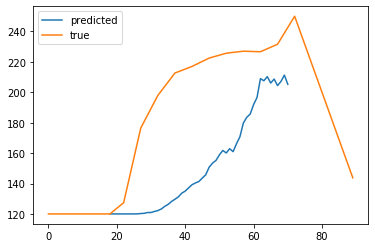

In [325]:
plt.plot(range(18,71),y_pred, label='predicted')
plt.plot(women_salary, label='true')
plt.legend()

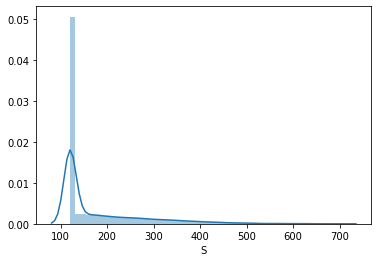

In [274]:
sbn.distplot(df['S'].dropna())
df['S'].isnull().sum()
df['is_na'] = df['S'].isnull()

In [277]:
S = 2.45 +  0.92 * -1.653578 + 0.84 * np.log(8.608565+1)

In [279]:
np.exp(S)

16.934252502677552

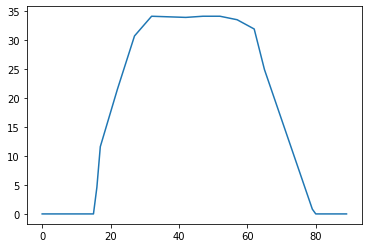

In [9]:
plt.plot(women_hours)

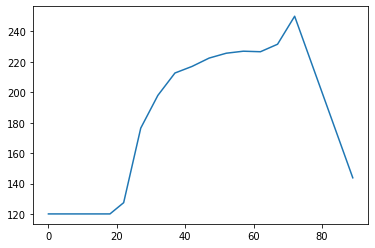

In [93]:
plt.plot(women_salary)

7662.364466233265

In [282]:
np.isnan(None)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''